In [1]:
%reload_ext autoreload
%autoreload 2
import numpy as np
import pynocular as pn
from matplotlib import pyplot as plt

In [2]:
n = pn.PointData()
n['a'] = np.arange(10)
n['b'] = np.arange(20).reshape(-1,2)

In [3]:
n

a,0,1,2,3,4,5,6,7,8,9
b,[0 1],[2 3],[4 5],[6 7],[8 9],[10 11],[12 13],[14 15],[16 17],[18 19]


In [4]:
g = pn.GridData()

In [5]:
g['a'] = np.arange(10)

adding default grid


In [6]:
d = {'a':0}

In [7]:
list(d.items())[0]

('a', 0)

In [8]:
#g.grid['x'] = 33

In [9]:
g['b'] = np.arange(30).reshape(10,-1)

In [10]:
g

x,0,1,2,3,4,5,6,7,8,9
a,0,1,2,3,4,5,6,7,8,9
b,[0 1 2],[3 4 5],[6 7 8],[ 9 10 11],[12 13 14],[15 16 17],[18 19 20],[21 22 23],[24 25 26],[27 28 29]


In [11]:
g.flat('b')

masked_array(
  data=[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11],
        [12, 13, 14],
        [15, 16, 17],
        [18, 19, 20],
        [21, 22, 23],
        [24, 25, 26],
        [27, 28, 29]],
  mask=False,
  fill_value=999999)

In [12]:
g.grid.size

10

In [13]:
g

x,0,1,2,3,4,5,6,7,8,9
a,0,1,2,3,4,5,6,7,8,9
b,[0 1 2],[3 4 5],[6 7 8],[ 9 10 11],[12 13 14],[15 16 17],[18 19 20],[21 22 23],[24 25 26],[27 28 29]


In [14]:
g['b'].ndim

2

In [15]:
import matplotlib.image as mpimg

img=mpimg.imread('on-fire.jpeg')

In [16]:
g = pn.GridData()

g['bw'] = np.average(img, axis=-1).T[:,::-1] / 255
g['img'] = img.swapaxes(0,1)[:,::-1,:] / 255.

adding default grid


In [17]:
g.grid.vars

['x', 'y']

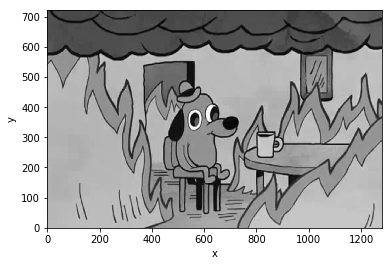

In [18]:
g.plot('bw', cmap='gray')

In [19]:
g.shape[3:]

()

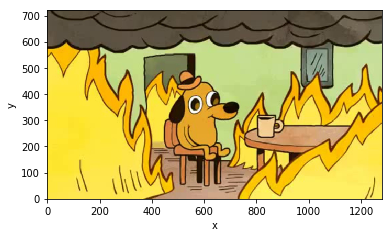

In [20]:
g.binwise(function='mean', x=0.5, y=0.5).plot('img')

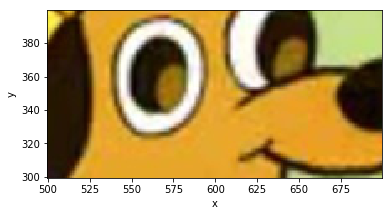

In [21]:
g[500:700, 300:400].plot('img')

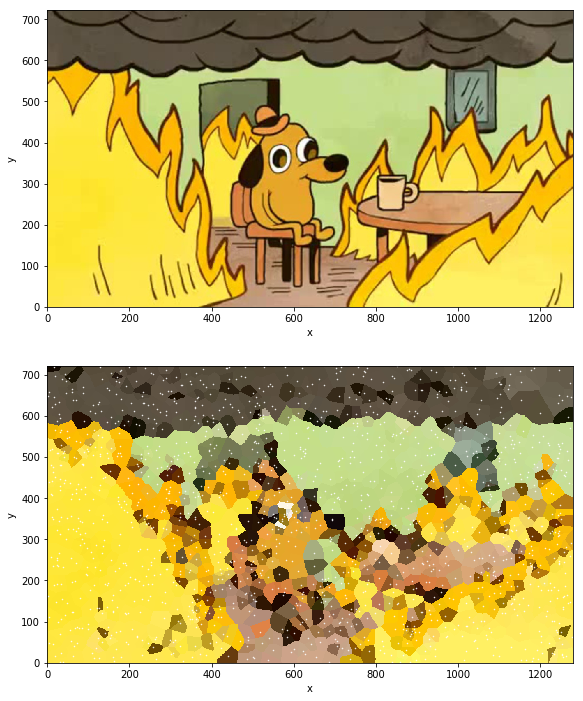

In [42]:
fig, ax = plt.subplots(2,1, figsize=(12,12))
g.plot('img', ax=ax[0])

N=1500
pd = pn.PointData(x=np.random.rand(N)*g.grid['x'].edges.max(), y=np.random.rand(N)*g.grid['y'].edges.max())
g.lookup(pd).interp(g, method='nearest').plot('img', ax=ax[1])
pd.plot('x', 'y', '.', color='w', ax=ax[1], ms=1)

In [26]:
g.lookup(pd)

x,391,268,747,829,534,614,...,515,1.19e+03,66.1,1.08e+03,777,600
y,393,512,353,76.7,294,121,...,524,549,359,623,558,20.6
bw,0.728,0.72,0.684,0.498,0.571,0.511,...,0.427,0.752,0.708,0.299,0.736,0.659
img,[0.996 0.89 0.298],[0.773 0.867 0.522],[0.737 0.843 0.471],[0.741 0.533 0.22 ],[0.906 0.651 0.157],[0.757 0.478 0.298],...,[0.467 0.486 0.329],[0.78 0.871 0.604],[0.996 0.906 0.224],[0.345 0.31 0.243],[0.769 0.875 0.565],[0.8 0.635 0.541]


In [27]:
g.vars

['x', 'y', 'bw', 'img']

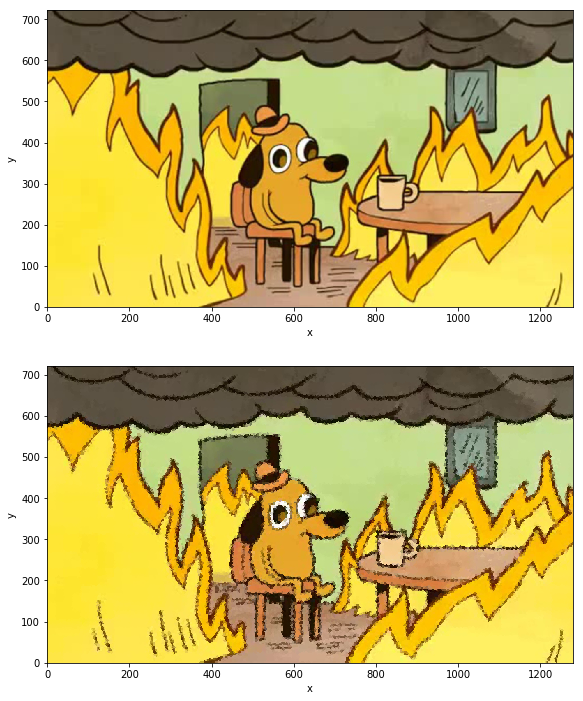

In [28]:
fig, ax = plt.subplots(2,1, figsize=(12,12))
g.plot('img', ax=ax[0])

N=50000
pd = pn.PointData()
pd['x'] = np.random.rand(N)*g.grid['x'].edges.max()
pd['y'] = np.random.rand(N)*g.grid['y'].edges.max()
pd['img'] = g.lookup(pd)['img']
g['voronoi'] = pd.interp(g, method='nearest')['img']
g.plot('voronoi', ax=ax[1])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


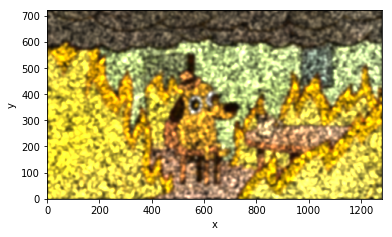

In [29]:
pk = pd.kde(x=1000, y=1000, bw=5, density=False, kernel='gaussian')
pk['img'] /= np.max(pk['img']) / 2
#pk['img_exp'] = np.exp(pk['img'])
#pk['img_exp'] /= np.max(pk['img_exp'])
pk.plot('img')

In [41]:
np.arange(12).reshape(3,4)[..., np.newaxis]

array([[[ 0],
        [ 1],
        [ 2],
        [ 3]],

       [[ 4],
        [ 5],
        [ 6],
        [ 7]],

       [[ 8],
        [ 9],
        [10],
        [11]]])

In [31]:
pk

y \ x,[0.011 1.291],[1.291 2.57 ],[2.57 3.85],[3.85 5.129],[5.129 6.409],[6.409 7.688],...,[1271.82 1273.1 ],[1273.1 1274.379],[1274.379 1275.659],[1275.659 1276.938],[1276.938 1278.218],[1278.218 1279.497]
[0.008 0.729],img = [0.271 0.246 0.075]counts = 0.0309,img = [0.352 0.319 0.098]counts = 0.04,img = [0.436 0.395 0.121]counts = 0.0496,img = [0.517 0.468 0.144]counts = 0.0588,img = [0.59 0.534 0.164]counts = 0.0671,img = [0.649 0.587 0.18 ]counts = 0.0738,...,img = [0.306 0.289 0.118]counts = 0.0349,img = [0.294 0.277 0.113]counts = 0.0334,img = [0.281 0.264 0.108]counts = 0.0319,img = [0.263 0.248 0.102]counts = 0.0299,img = [0.24 0.226 0.093]counts = 0.0272,img = [0.21 0.198 0.081]counts = 0.0239
[0.729 1.451],img = [0.303 0.275 0.084]counts = 0.0345,img = [0.394 0.356 0.109]counts = 0.0448,img = [0.488 0.442 0.135]counts = 0.0555,img = [0.579 0.524 0.161]counts = 0.0659,img = [0.661 0.599 0.183]counts = 0.0752,img = [0.727 0.659 0.202]counts = 0.0828,...,img = [0.355 0.335 0.137]counts = 0.0404,img = [0.342 0.322 0.132]counts = 0.0389,img = [0.327 0.308 0.126]counts = 0.0371,img = [0.306 0.288 0.118]counts = 0.0348,img = [0.278 0.262 0.108]counts = 0.0316,img = [0.244 0.23 0.095]counts = 0.0277
[1.451 2.172],img = [0.335 0.303 0.093]counts = 0.0381,img = [0.435 0.394 0.121]counts = 0.0494,img = [0.539 0.488 0.15 ]counts = 0.0613,img = [0.64 0.58 0.178]counts = 0.0728,img = [0.731 0.662 0.203]counts = 0.0831,img = [0.805 0.729 0.223]counts = 0.0916,...,img = [0.405 0.383 0.156]counts = 0.0462,img = [0.391 0.369 0.151]counts = 0.0445,img = [0.374 0.352 0.145]counts = 0.0425,img = [0.35 0.33 0.136]counts = 0.0398,img = [0.318 0.3 0.123]counts = 0.0362,img = [0.278 0.262 0.108]counts = 0.0316
[2.172 2.894],img = [0.366 0.331 0.101]counts = 0.0416,img = [0.474 0.43 0.132]counts = 0.054,img = [0.588 0.533 0.163]counts = 0.0669,img = [0.699 0.633 0.194]counts = 0.0795,img = [0.798 0.723 0.221]counts = 0.0908,img = [0.88 0.797 0.244]counts = 0.1,...,img = [0.456 0.43 0.176]counts = 0.0519,img = [0.44 0.415 0.17 ]counts = 0.0501,img = [0.421 0.397 0.163]counts = 0.0479,img = [0.395 0.372 0.153]counts = 0.0449,img = [0.358 0.337 0.139]counts = 0.0407,img = [0.313 0.295 0.121]counts = 0.0356
[2.894 3.615],img = [0.395 0.358 0.11 ]counts = 0.045,img = [0.513 0.464 0.142]counts = 0.0583,img = [0.635 0.575 0.176]counts = 0.0723,img = [0.755 0.684 0.209]counts = 0.0859,img = [0.862 0.781 0.239]counts = 0.0981,img = [0.951 0.861 0.263]counts = 0.108,...,img = [0.505 0.477 0.195]counts = 0.0575,img = [0.489 0.461 0.189]counts = 0.0556,img = [0.468 0.441 0.181]counts = 0.0532,img = [0.438 0.413 0.17 ]counts = 0.0498,img = [0.397 0.374 0.154]counts = 0.0451,img = [0.346 0.326 0.134]counts = 0.0393
[3.615 4.337],img = [0.423 0.383 0.117]counts = 0.0482,img = [0.549 0.497 0.152]counts = 0.0624,img = [0.68 0.616 0.188]counts = 0.0774,img = [0.807 0.731 0.224]counts = 0.0919,img = [0.922 0.835 0.256]counts = 0.105,img = [1.016 0.921 0.282]counts = 0.116,...,img = [0.552 0.521 0.213]counts = 0.0628,img = [0.535 0.504 0.207]counts = 0.0609,img = [0.512 0.483 0.198]counts = 0.0583,img = [0.479 0.451 0.186]counts = 0.0545,img = [0.434 0.408 0.168]counts = 0.0493,img = [0.377 0.355 0.146]counts = 0.0429
...,...,...,...,...,...,...,...,...,...,...,...,...,...
[717.171 717.892],img = [0.13 0.117 0.095]counts = 0.0416,img = [0.151 0.135 0.11 ]counts = 0.0484,img = [0.168 0.151 0.123]counts = 0.0544,img = [0.181 0.163 0.132]counts = 0.0593,img = [0.189 0.17 0.137]counts = 0.0629,img = [0.193 0.172 0.139]counts = 0.0654,...,img = [0.286 0.26 0.212]counts = 0.0819,img = [0.269 0.245 0.2 ]counts = 0.0771,img = [0.249 0.227 0.185]counts = 0.0714,img = [0.226 0.206 0.168]counts = 0.0647,img = [0.2 0.182 0.149]counts = 0.0573,img = [0.172 0.157 0.128]counts = 0.0494
[717.892 718.614],img = [0.118 0.107 0.087]counts = 0.038,img = [0.137 0.123 0.1 ]counts = 0.0441,img = [0.153 0.137 0.112]counts = 0.0495,img = [0.164 0.148 0.12 ]counts = 0.054,img = [0.172 0.

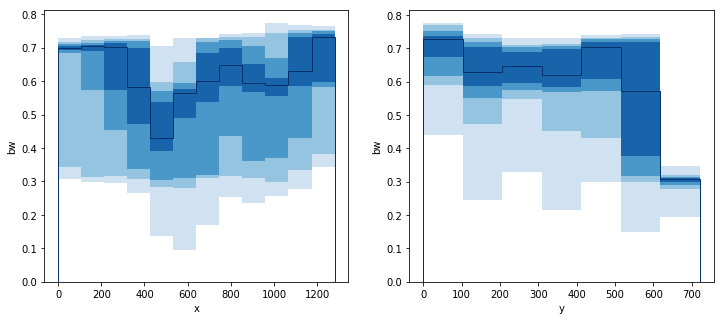

In [48]:
fig, ax = plt.subplots(1,2, figsize=(12,5))

g.binwise(function=lambda x: [np.percentile(x, 10*i) for i in range(1, 10)], x=0.01).plot_bands('bw', ax=ax[0])
g.binwise(function=lambda x: [np.percentile(x, 10*i) for i in range(1, 10)], y=0.01).plot_bands('bw', ax=ax[1])

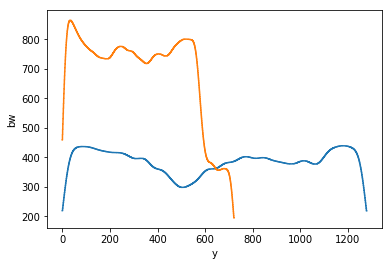

In [49]:
#g.binwise(function=lambda x: [np.percentile(x, 10*i) for i in range(1, 10)], x=0.01).plot_bands('bw')
g.kde(x=1000, density=False).plot('bw')
g.kde(y=1000, density=False).plot('bw')

In [50]:
g['img'].shape

(1280, 722, 3)

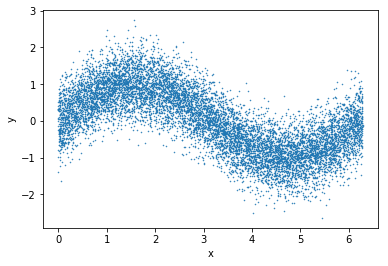

In [51]:
p = pn.PointData()
p['x'] = np.random.rand(10000) * 2 * np.pi
p['y'] = np.sin(p['x']) + np.random.randn(p.array_shape[0]) * 0.5
p.plot('.', ms=1)

In [53]:
p['density'] = p.histogram(x=10, y=10).interp(x=100, y=100).lookup(p)['counts']

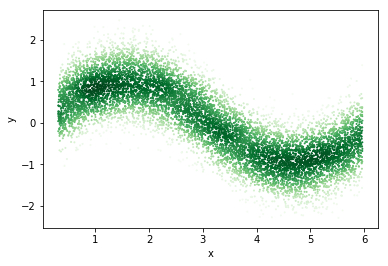

In [54]:
p.plot_scatter('x', 'y', 'density', s=1, cmap='Greens')

/home/peller/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


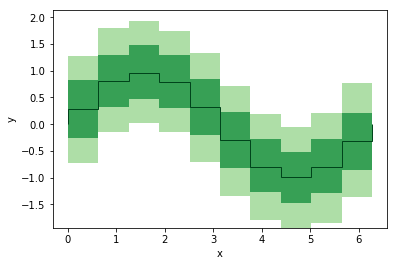

In [55]:
p.binwise(function=lambda x : np.percentile(x, [2.5, 16, 50, 84, 97.5]), x=10).plot_bands('y', cmap='Greens')
#p.plot('x', 'y', '.', color='b', ms=1)

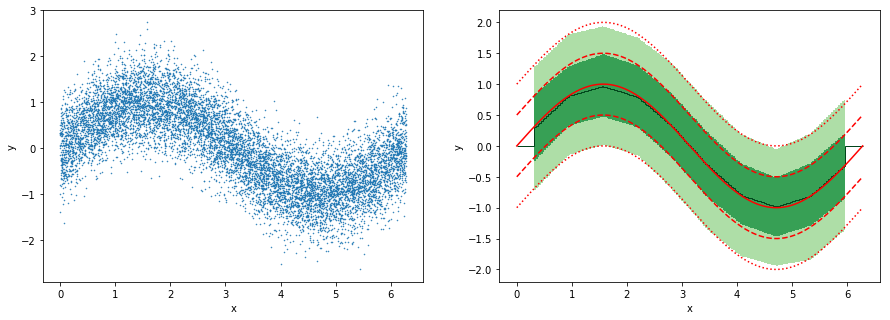

In [56]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

p.plot('x', 'y', '.', ms=1, ax=ax[0])
p.binwise(function=lambda x : np.percentile(x, [2.5, 16, 50, 84, 97.5]), x=10).interp(x=200, method='linear', fill_value=np.nan).plot_bands('y', cmap='Greens', ax=ax[1])

# truth
x = np.linspace(0, 2*np.pi, 1000)
ax[1].plot(x, np.sin(x), color='red')
ax[1].plot(x, np.sin(x)+0.5, '--', color='red')
ax[1].plot(x, np.sin(x)-0.5, '--', color='red')
ax[1].plot(x, np.sin(x)+1, ':', color='red')
ax[1].plot(x, np.sin(x)-1, ':', color='red')

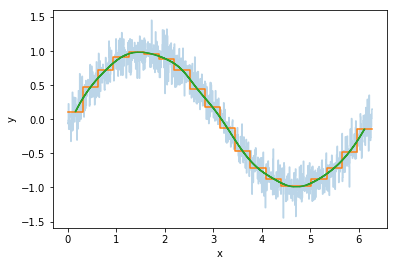

In [59]:
p.binwise(function='mean', x=1000).plot('y', alpha=0.3)
p.binwise(function='mean', x=20).plot('y')
p.binwise(function='mean', x=20).interp(method='cubic', x=1000).plot('y')

In [60]:
s = pn.GridData()
s.grid['x'].points = np.linspace(0, 3 * np.pi, 20)
s.grid['y'].points = np.linspace(0, 3 * np.pi, 20)
s['z'] = np.cos(s['x']) * np.cos(s['y'])

needs to be checked, is weird behaviour
needs to be checked, is weird behaviour


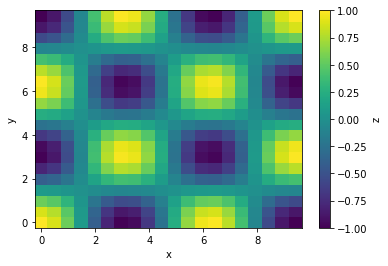

In [61]:
s.plot(cbar=True)

In [62]:
s['z']

y \ x,0,0.496,0.992,1.49,1.98,2.48,...,6.94,7.44,7.94,8.43,8.93,9.42
0,1,0.879,0.547,0.0826,-0.402,-0.789,...,0.789,0.402,-0.0826,-0.547,-0.879,-1
0.496,0.879,0.773,0.481,0.0726,-0.353,-0.694,...,0.694,0.353,-0.0726,-0.481,-0.773,-0.879
0.992,0.547,0.481,0.299,0.0452,-0.22,-0.432,...,0.432,0.22,-0.0452,-0.299,-0.481,-0.547
1.49,0.0826,0.0726,0.0452,0.00682,-0.0332,-0.0652,...,0.0652,0.0332,-0.00682,-0.0452,-0.0726,-0.0826
1.98,-0.402,-0.353,-0.22,-0.0332,0.161,0.317,...,-0.317,-0.161,0.0332,0.22,0.353,0.402
2.48,-0.789,-0.694,-0.432,-0.0652,0.317,0.623,...,-0.623,-0.317,0.0652,0.432,0.694,0.789
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6.94,0.789,0.694,0.432,0.0652,-0.317,-0.623,...,0.623,0.317,-0.0652,-0.432,-0.694,-0.789
7.44,0.402,0.353,0.22,0.0332,-0.161,-0.317,...,0.317,0.161,-0.0332,-0.22,-0.353,-0.402
7.94,-0.0826,-0.0726,-0.0452,-0.00682,0.0332,0.0652,...,-0.0652,-0.0332,0.00682,0.0452,0.0726,0.0826


In [63]:
np.max(s['z'], axis='x')

y,0,0.496,0.992,1.49,1.98,2.48,...,6.94,7.44,7.94,8.43,8.93,9.42
,1,0.879,0.547,0.0826,0.402,0.789,...,0.789,0.402,0.0826,0.547,0.879,1


In [64]:
np.square(s['z'])

y \ x,0,0.496,0.992,1.49,1.98,2.48,...,6.94,7.44,7.94,8.43,8.93,9.42
0,1,0.773,0.299,0.00682,0.161,0.623,...,0.623,0.161,0.00682,0.299,0.773,1
0.496,0.773,0.598,0.231,0.00527,0.125,0.482,...,0.482,0.125,0.00527,0.231,0.598,0.773
0.992,0.299,0.231,0.0895,0.00204,0.0483,0.186,...,0.186,0.0483,0.00204,0.0895,0.231,0.299
1.49,0.00682,0.00527,0.00204,4.65e-05,0.0011,0.00425,...,0.00425,0.0011,4.65e-05,0.00204,0.00527,0.00682
1.98,0.161,0.125,0.0483,0.0011,0.026,0.1,...,0.1,0.026,0.0011,0.0483,0.125,0.161
2.48,0.623,0.482,0.186,0.00425,0.1,0.388,...,0.388,0.1,0.00425,0.186,0.482,0.623
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6.94,0.623,0.482,0.186,0.00425,0.1,0.388,...,0.388,0.1,0.00425,0.186,0.482,0.623
7.44,0.161,0.125,0.0483,0.0011,0.026,0.1,...,0.1,0.026,0.0011,0.0483,0.125,0.161
7.94,0.00682,0.00527,0.00204,4.65e-05,0.0011,0.00425,...,0.00425,0.0011,4.65e-05,0.00204,0.00527,0.00682


In [65]:
np.sum(s['z'], axis='y')

x,0,0.496,0.992,1.49,1.98,2.48,...,6.94,7.44,7.94,8.43,8.93,9.42
,-5.55e-16,-6.66e-16,0,0,5.55e-17,7.77e-16,...,-2.22e-16,-2.22e-16,4.16e-17,4.44e-16,6.66e-16,5.55e-16


In [66]:
np.mean(s['z'], axis='x')

y,0,0.496,0.992,1.49,1.98,2.48,...,6.94,7.44,7.94,8.43,8.93,9.42
,-2.78e-17,-3.33e-17,0,-1.39e-18,1.39e-17,2.78e-17,...,-3.33e-17,0,3.47e-18,2.22e-17,3.33e-17,2.78e-17


In [67]:
s['z'].mean(axis='x')

y,0,0.496,0.992,1.49,1.98,2.48,...,6.94,7.44,7.94,8.43,8.93,9.42
,-2.78e-17,-3.33e-17,0,-1.39e-18,1.39e-17,2.78e-17,...,-3.33e-17,0,3.47e-18,2.22e-17,3.33e-17,2.78e-17


In [68]:
s['x']

y \ x,0,0.496,0.992,1.49,1.98,2.48,...,6.94,7.44,7.94,8.43,8.93,9.42
0,0,0.496,0.992,1.49,1.98,2.48,...,6.94,7.44,7.94,8.43,8.93,9.42
0.496,0,0.496,0.992,1.49,1.98,2.48,...,6.94,7.44,7.94,8.43,8.93,9.42
0.992,0,0.496,0.992,1.49,1.98,2.48,...,6.94,7.44,7.94,8.43,8.93,9.42
1.49,0,0.496,0.992,1.49,1.98,2.48,...,6.94,7.44,7.94,8.43,8.93,9.42
1.98,0,0.496,0.992,1.49,1.98,2.48,...,6.94,7.44,7.94,8.43,8.93,9.42
2.48,0,0.496,0.992,1.49,1.98,2.48,...,6.94,7.44,7.94,8.43,8.93,9.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6.94,0,0.496,0.992,1.49,1.98,2.48,...,6.94,7.44,7.94,8.43,8.93,9.42
7.44,0,0.496,0.992,1.49,1.98,2.48,...,6.94,7.44,7.94,8.43,8.93,9.42
7.94,0,0.496,0.992,1.49,1.98,2.48,...,6.94,7.44,7.94,8.43,8.93,9.42


In [69]:
test = pn.GridData()#x=[0,1,2], y=[0,1,2,3])

In [70]:
test['a'] = np.arange(6).reshape(2,3)
test['b'] = np.zeros_like(test['a'])

adding default grid


In [71]:
test

y \ x,0,1
0,a = 0b = 0,a = 3b = 0
1,a = 1b = 0,a = 4b = 0
2,a = 2b = 0,a = 5b = 0


In [72]:
test['a']

y \ x,0,1
0,0,3
1,1,4
2,2,5


In [73]:
test['a'].T

x \ y,0,1,2
0,0,1,2
1,3,4,5


In [74]:
np.mean(test['a'], axis='x')

y,0,1,2
,1.5,2.5,3.5


In [75]:
np.sum(test['b'], axis='x')

y,0,1,2
,0,0,0


In [76]:
np.square(test['a'])

y \ x,0,1
0,0,9
1,1,16
2,4,25


In [77]:
np.max(test['a'], axis='x')

y,0,1,2
,3,4,5


In [78]:
test['a']

y \ x,0,1
0,0,3
1,1,4
2,2,5


In [79]:
test['a'][test['x'] > 1]

y \ x,0,1
0,--,--
1,--,--
2,--,--


In [80]:
test.grid['x'].edges

edges: array([[-0.5,  0.5],
       [ 0.5,  1.5]])

In [68]:
test['a']

y \ x,0,1
0,0,3
1,1,4
2,2,5


In [69]:
test['a'][test['x'] >= test['y']] + test['a']

y \ x,0,1
0,0,6
1,--,8
2,--,--


In [70]:
test['a']

y \ x,0,1
0,0,3
1,1,4
2,2,5


In [71]:
#(test['a'] + 
(test['a'][test['x'] == test['y']])

y \ x,0,1
0,0,--
1,--,4
2,--,--


In [72]:
np.sum(test['a'][test['x'] == test['y']])

4

In [73]:
test['a'] + test['a'][test['a'] > 3] * 3.

y \ x,0,1
0,--,--
1,--,16
2,--,20


In [74]:
test['a'][test['a'] > 3] += test['a'][test['a'] > 4] 

In [75]:
test['a'] *= -1

In [76]:
test['a']

y \ x,0,1
0,0,-3
1,-1,-4
2,-2,-10


In [80]:
test['a'][0,:] *= -1

In [81]:
test['a']

y \ x,0,1
0,0,-3
1,-1,-4
2,-2,-10


In [82]:
(test['a'].data * 300)

array([[    0,  -300,  -600],
       [ -900, -1200, -3000]])

In [83]:
test['a'] ** 2

y \ x,0,1
0,0,9
1,1,16
2,4,100


In [84]:
str(test['a'][0])
test['a'][0].shape
test['a'].ndim

2

In [85]:
test['a'].grid[0]

Grid(
Axis("y",
points = array([0, 1, 2]),
edges = edges: None)
nbins = 3),)

In [86]:
test['a'][0,[0]]

y,0
,0


In [87]:
test[0,0]

{'a': 0, 'b': 0}

In [88]:
test['a'].data[[0],[0],np.newaxis]

array([[0]])

In [89]:
np.std(test['a'], axis='x')

y,0,1,2
,1.5,1.5,4


In [90]:
np.sum(test['a'])

-20

In [91]:
l = np.arange(10)

In [92]:
l

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [93]:
mask = l > 5

In [94]:
mask

array([False, False, False, False, False, False,  True,  True,  True,
        True])

In [95]:
['%s'%s for s in np.asanyarray(np.ma.MaskedArray(l, mask))]

['0', '1', '2', '3', '4', '5', '--', '--', '--', '--']

In [96]:
ma = np.ma.MaskedArray(l, mask)

In [97]:
(-np.ones(10) * np.asanyarray(ma)).data

array([-0., -1., -2., -3., -4., -5., -1., -1., -1., -1.])

In [98]:
np.array(ma) * -1

array([ 0, -1, -2, -3, -4, -5, -6, -7, -8, -9])

In [99]:
np.asarray(ma)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [103]:
np.asanyarray(ma)

masked_array(data=[0, 1, 2, 3, 4, 5, --, --, --, --],
             mask=[False, False, False, False, False, False,  True,  True,
                    True,  True],
       fill_value=999999)

In [104]:
ma.mask

array([False, False, False, False, False, False,  True,  True,  True,
        True])

In [105]:
np.sum(test['a'])

-20

In [106]:
np.sum(ma)

15

In [107]:
ma

masked_array(data=[0, 1, 2, 3, 4, 5, --, --, --, --],
             mask=[False, False, False, False, False, False,  True,  True,
                    True,  True],
       fill_value=999999)

In [108]:
axis = (1,)

In [109]:
axis

(1,)

In [110]:
axis[0] = 3

TypeError: 'tuple' object does not support item assignment

In [ ]:
any(sorted((1,4,3)) < 3)

In [108]:
np.arange(12)[:,np.newaxis]

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11]])

In [113]:
np.arange(12)[:,np.newaxis] @ np.arange(12)[:,np.newaxis].T

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11],
       [  0,   2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22],
       [  0,   3,   6,   9,  12,  15,  18,  21,  24,  27,  30,  33],
       [  0,   4,   8,  12,  16,  20,  24,  28,  32,  36,  40,  44],
       [  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55],
       [  0,   6,  12,  18,  24,  30,  36,  42,  48,  54,  60,  66],
       [  0,   7,  14,  21,  28,  35,  42,  49,  56,  63,  70,  77],
       [  0,   8,  16,  24,  32,  40,  48,  56,  64,  72,  80,  88],
       [  0,   9,  18,  27,  36,  45,  54,  63,  72,  81,  90,  99],
       [  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110],
       [  0,  11,  22,  33,  44,  55,  66,  77,  88,  99, 110, 121]])

In [122]:
blah=33.000
f'ldasdhadh {blah:.2g} {blah}'

'ldasdhadh 33 33.0'

In [124]:
'test %ff'%{ff:33}

NameError: name 'ff' is not defined